# Filtering cells and Generating Input


In [3]:
# Import Packages

%load_ext autoreload
%autoreload 2

import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import anndata as ad
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from anndata import AnnData
from natsort import natsorted

# Customized packages
import starmap.sc_util as su
# test()

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

# Set Paths

In [5]:
##Set path
base_path = ''

input_path = os.path.join(base_path, 'input')

out_path = os.path.join(base_path, 'output')
if not os.path.exists(out_path):
    os.mkdir(out_path)
    
fig_path = os.path.join(base_path, 'figures')
if not os.path.exists(fig_path):
    os.mkdir(fig_path)

sc.settings.figdir = fig_path

In [6]:
# load STARmap sample 1 h5ad file 
sdata_sample1 = sc.read_h5ad(os.path.join(input_path, 'STARmap_sample1_raw.h5ad'))
sdata_sample1

AnnData object with n_obs × n_vars = 12205 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label'

In [7]:
# load STARmap sample 2 h5ad file 
sdata_sample2 = sc.read_h5ad(os.path.join(input_path, 'STARmap_sample2_raw.h5ad'))
sdata_sample2

AnnData object with n_obs × n_vars = 11127 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label'

In [8]:
# load STARmap sample 3 h5ad file 
sdata_sample3 = sc.read_h5ad(os.path.join(input_path, 'STARmap_sample3_raw.h5ad'))
sdata_sample3

AnnData object with n_obs × n_vars = 10894 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label'

In [9]:
# load STARmap sample 4 h5ad file 
sdata_sample4 = sc.read_h5ad(os.path.join(input_path, 'STARmap_sample4_raw.h5ad'))
sdata_sample4

AnnData object with n_obs × n_vars = 12460 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label'

In [10]:
# load RIBOmap sample 5 h5ad file 
rdata_sample5 = sc.read_h5ad(os.path.join(input_path, 'RIBOmap_sample5_raw.h5ad'))
rdata_sample5

AnnData object with n_obs × n_vars = 11659 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label'

In [11]:
# load RIBOmap sample 6 h5ad file 
rdata_sample6 = sc.read_h5ad(os.path.join(input_path, 'RIBOmap_sample6_raw.h5ad'))
rdata_sample6

AnnData object with n_obs × n_vars = 10054 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label'

In [12]:
# load RIBOmap sample 7 h5ad file 
rdata_sample7 = sc.read_h5ad(os.path.join(input_path, 'RIBOmap_sample7_raw.h5ad'))
rdata_sample7

AnnData object with n_obs × n_vars = 13073 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label'

In [13]:
# load RIBOmap sample 8 h5ad file 
rdata_sample8 = sc.read_h5ad(os.path.join(input_path, 'RIBOmap_sample8_raw.h5ad'))
rdata_sample8

AnnData object with n_obs × n_vars = 11326 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label'


# Creating filtered (cell) input file 

# STARmap Samples

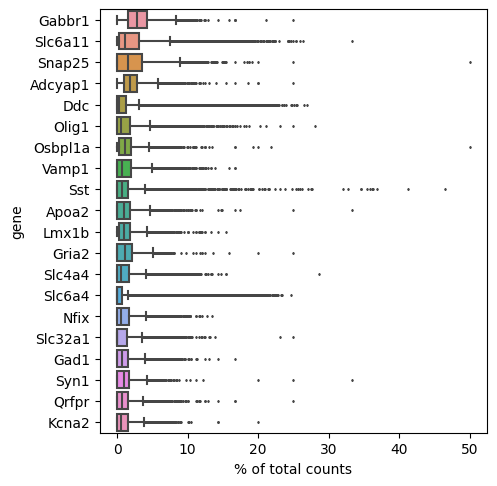

3.472035095443937
6.453654165075877
31.20221037703557
634.0185207964117


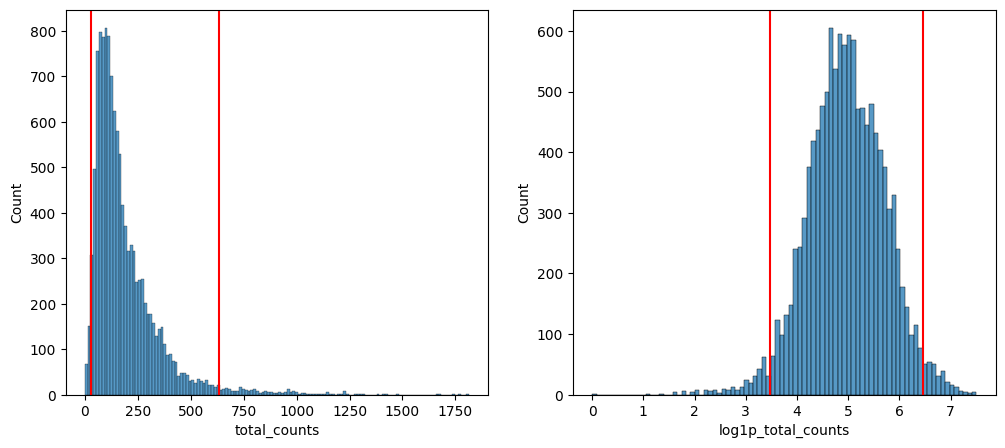

With current threshold, there are 11608 cells left and median counts per cell is 142.0


In [14]:
##STARmap sample 1

##Plot top 20 most expressed genes (before qc)
sc.pl.highest_expr_genes(sdata_sample1, n_top = 20)

# calculate pp metric
sc.pp.calculate_qc_metrics(sdata_sample1, percent_top = [5, 10, 50, 100], inplace=True)

# Calculate max count for each gene
sdata_sample1.var['max_counts_sample'] = sdata_sample1.X.max(axis=0)

# Total counts describe statistics
sdata_sample1.obs['total_counts'].describe()

# max counts describe statistics
sdata_sample1.var['max_counts_sample'].describe()

# mad threshold
from scipy import stats
n = 3
mad = stats.median_abs_deviation(sdata_sample1.obs['log1p_total_counts'], scale=1)
lower_bd = sdata_sample1.obs['log1p_total_counts'].median() - n*mad
upper_bd = sdata_sample1.obs['log1p_total_counts'].median() + n*mad

print(lower_bd)
print(upper_bd)
print(np.expm1(lower_bd))
print(np.expm1(upper_bd))

# mad threshold
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(sdata_sample1.obs['total_counts'], ax=axs[0])
axs[0].axvline(np.expm1(lower_bd), c='r')
axs[0].axvline(np.expm1(upper_bd), c='r')

sns.histplot(sdata_sample1.obs['log1p_total_counts'], ax=axs[1])
axs[1].axvline(lower_bd, c='r')
axs[1].axvline(upper_bd, c='r')

# plt.savefig(os.path.join(fig_path, 'reads_filtering_threshold.pdf'))
plt.show()

# Total counts describe statistics
ncell_left = sdata_sample1.obs.loc[(sdata_sample1.obs['total_counts'] >= np.expm1(lower_bd)) & (sdata_sample1.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].shape
median_counts = sdata_sample1.obs.loc[(sdata_sample1.obs['total_counts'] >= np.expm1(lower_bd)) & (sdata_sample1.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].median()

print(f'With current threshold, there are {ncell_left[0]} cells left and median counts per cell is {median_counts}')

# Filtration (cell)
sc.pp.filter_cells(sdata_sample1, min_genes=10)
sc.pp.filter_cells(sdata_sample1, min_counts=np.expm1(lower_bd))
sc.pp.filter_cells(sdata_sample1, max_counts=np.expm1(upper_bd))

sdata_sample1.layers['raw'] = sdata_sample1.X.copy()
sdata_sample1.X.shape

# save combined h5ad
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
sdata_sample1.write_h5ad(f"{out_path}/{date}-sdata_sample1-3mad-filtered.h5ad")

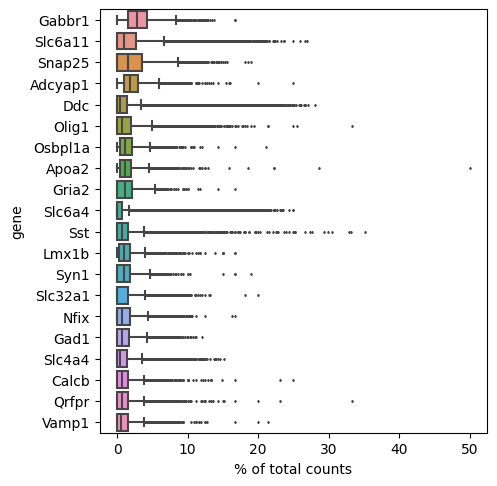

3.551713345993077
6.429151827564395
33.87301587301586
618.6481565771505


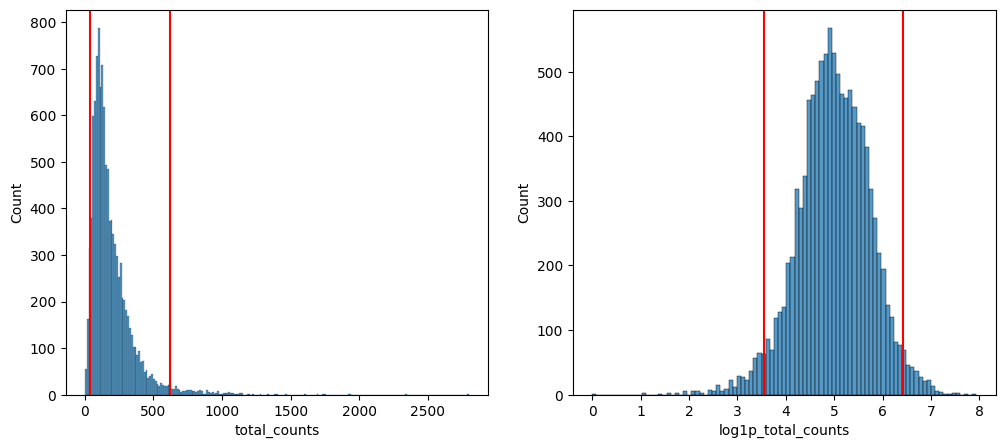

With current threshold, there are 10494 cells left and median counts per cell is 147.0


In [15]:
##STARmap sample 2

##Plot top 20 most expressed genes (before qc)
sc.pl.highest_expr_genes(sdata_sample2, n_top = 20)

# calculate pp metric
sc.pp.calculate_qc_metrics(sdata_sample2, percent_top = [5, 10, 50, 100], inplace=True)

# Calculate max count for each gene
sdata_sample2.var['max_counts_sample'] = sdata_sample2.X.max(axis=0)

# Total counts describe statistics
sdata_sample2.obs['total_counts'].describe()

# max counts describe statistics
sdata_sample2.var['max_counts_sample'].describe()

# mad threshold
from scipy import stats
n = 3
mad = stats.median_abs_deviation(sdata_sample2.obs['log1p_total_counts'], scale=1)
lower_bd = sdata_sample2.obs['log1p_total_counts'].median() - n*mad
upper_bd = sdata_sample2.obs['log1p_total_counts'].median() + n*mad

print(lower_bd)
print(upper_bd)
print(np.expm1(lower_bd))
print(np.expm1(upper_bd))

# mad threshold
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(sdata_sample2.obs['total_counts'], ax=axs[0])
axs[0].axvline(np.expm1(lower_bd), c='r')
axs[0].axvline(np.expm1(upper_bd), c='r')

sns.histplot(sdata_sample2.obs['log1p_total_counts'], ax=axs[1])
axs[1].axvline(lower_bd, c='r')
axs[1].axvline(upper_bd, c='r')

# plt.savefig(os.path.join(fig_path, 'reads_filtering_threshold.pdf'))
plt.show()

# Total counts describe statistics
ncell_left = sdata_sample2.obs.loc[(sdata_sample2.obs['total_counts'] >= np.expm1(lower_bd)) & (sdata_sample2.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].shape
median_counts = sdata_sample2.obs.loc[(sdata_sample2.obs['total_counts'] >= np.expm1(lower_bd)) & (sdata_sample2.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].median()

print(f'With current threshold, there are {ncell_left[0]} cells left and median counts per cell is {median_counts}')

# Filtration (cell)
sc.pp.filter_cells(sdata_sample2, min_genes=10)
sc.pp.filter_cells(sdata_sample2, min_counts=np.expm1(lower_bd))
sc.pp.filter_cells(sdata_sample2, max_counts=np.expm1(upper_bd))

sdata_sample2.layers['raw'] = sdata_sample2.X.copy()
sdata_sample2.X.shape

# save combined h5ad
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
sdata_sample2.write_h5ad(f"{out_path}/{date}-sdata_sample2-3mad-filtered.h5ad")

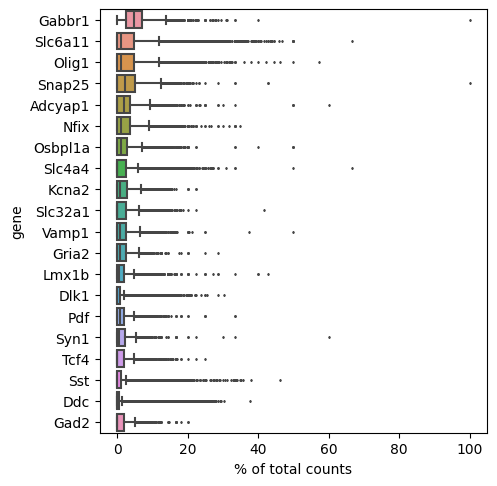

2.3455752004383257
6.151415283660393
9.439275676879006
468.3812244897952


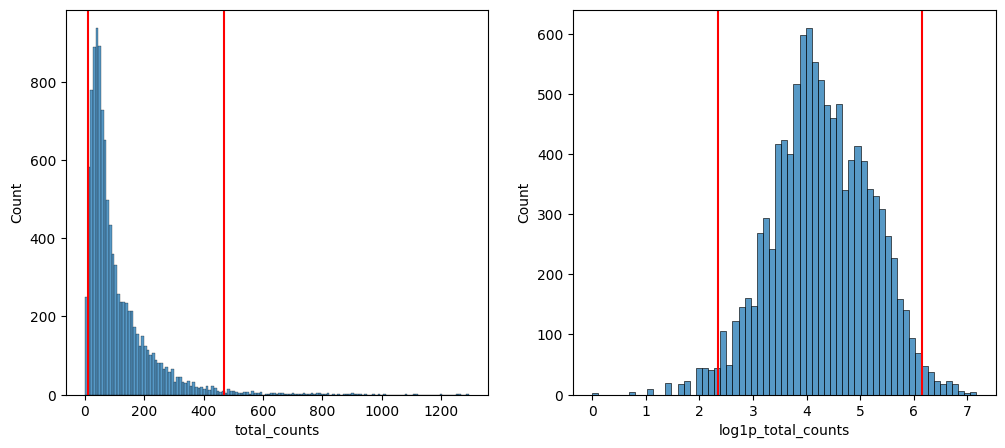

With current threshold, there are 10470 cells left and median counts per cell is 69.0


In [16]:
##STARmap sample 3

##Plot top 20 most expressed genes (before qc)
sc.pl.highest_expr_genes(sdata_sample3, n_top = 20)

# calculate pp metric
sc.pp.calculate_qc_metrics(sdata_sample3, percent_top = [5, 10, 50, 100], inplace=True)

# Calculate max count for each gene
sdata_sample3.var['max_counts_sample'] = sdata_sample3.X.max(axis=0)

# Total counts describe statistics
sdata_sample3.obs['total_counts'].describe()

# max counts describe statistics
sdata_sample3.var['max_counts_sample'].describe()

# mad threshold
from scipy import stats
n = 3
mad = stats.median_abs_deviation(sdata_sample3.obs['log1p_total_counts'], scale=1)
lower_bd = sdata_sample3.obs['log1p_total_counts'].median() - n*mad
upper_bd = sdata_sample3.obs['log1p_total_counts'].median() + n*mad

print(lower_bd)
print(upper_bd)
print(np.expm1(lower_bd))
print(np.expm1(upper_bd))

# mad threshold
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(sdata_sample3.obs['total_counts'], ax=axs[0])
axs[0].axvline(np.expm1(lower_bd), c='r')
axs[0].axvline(np.expm1(upper_bd), c='r')

sns.histplot(sdata_sample3.obs['log1p_total_counts'], ax=axs[1])
axs[1].axvline(lower_bd, c='r')
axs[1].axvline(upper_bd, c='r')

# plt.savefig(os.path.join(fig_path, 'reads_filtering_threshold.pdf'))
plt.show()

# Total counts describe statistics
ncell_left = sdata_sample3.obs.loc[(sdata_sample3.obs['total_counts'] >= np.expm1(lower_bd)) & (sdata_sample3.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].shape
median_counts = sdata_sample3.obs.loc[(sdata_sample3.obs['total_counts'] >= np.expm1(lower_bd)) & (sdata_sample3.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].median()

print(f'With current threshold, there are {ncell_left[0]} cells left and median counts per cell is {median_counts}')


# Filtration (cell)
sc.pp.filter_cells(sdata_sample3, min_genes=10)
sc.pp.filter_cells(sdata_sample3, min_counts=np.expm1(lower_bd))
sc.pp.filter_cells(sdata_sample3, max_counts=np.expm1(upper_bd))

sdata_sample3.layers['raw'] = sdata_sample3.X.copy()
sdata_sample3.X.shape

# save combined h5ad
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
sdata_sample3.write_h5ad(f"{out_path}/{date}-sdata_sample3-3mad-filtered.h5ad")

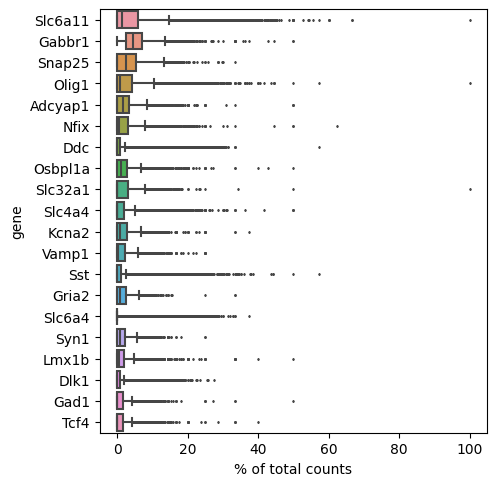

2.1108685646539653
6.357344444540554
7.255408527620247
575.7128282108695


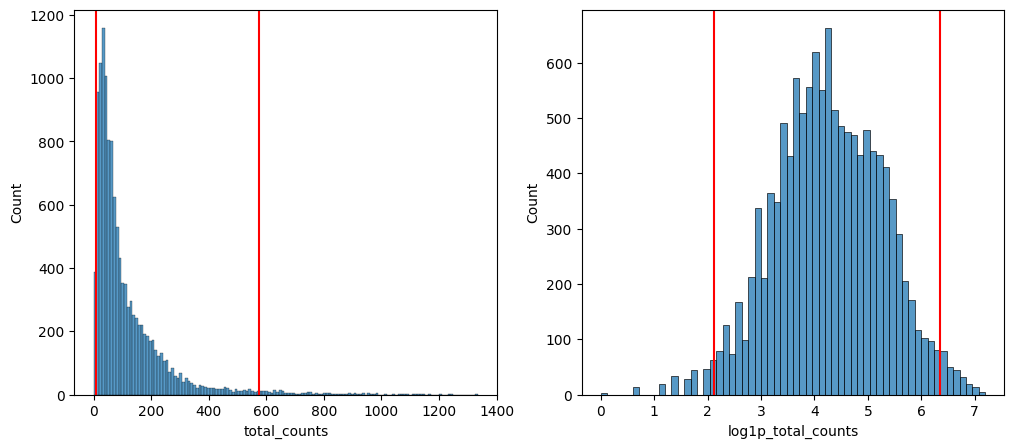

With current threshold, there are 11966 cells left and median counts per cell is 68.0


In [17]:
##STARmap sample 4

##Plot top 20 most expressed genes (before qc)
sc.pl.highest_expr_genes(sdata_sample4, n_top = 20)

# calculate pp metric
sc.pp.calculate_qc_metrics(sdata_sample4, percent_top = [5, 10, 50, 100], inplace=True)

# Calculate max count for each gene
sdata_sample4.var['max_counts_sample'] = sdata_sample4.X.max(axis=0)

# Total counts describe statistics
sdata_sample4.obs['total_counts'].describe()

# max counts describe statistics
sdata_sample4.var['max_counts_sample'].describe()

# mad threshold
from scipy import stats
n = 3
mad = stats.median_abs_deviation(sdata_sample4.obs['log1p_total_counts'], scale=1)
lower_bd = sdata_sample4.obs['log1p_total_counts'].median() - n*mad
upper_bd = sdata_sample4.obs['log1p_total_counts'].median() + n*mad

print(lower_bd)
print(upper_bd)
print(np.expm1(lower_bd))
print(np.expm1(upper_bd))

# mad threshold
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(sdata_sample4.obs['total_counts'], ax=axs[0])
axs[0].axvline(np.expm1(lower_bd), c='r')
axs[0].axvline(np.expm1(upper_bd), c='r')

sns.histplot(sdata_sample4.obs['log1p_total_counts'], ax=axs[1])
axs[1].axvline(lower_bd, c='r')
axs[1].axvline(upper_bd, c='r')

# plt.savefig(os.path.join(fig_path, 'reads_filtering_threshold.pdf'))
plt.show()

# Total counts describe statistics
ncell_left = sdata_sample4.obs.loc[(sdata_sample4.obs['total_counts'] >= np.expm1(lower_bd)) & (sdata_sample4.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].shape
median_counts = sdata_sample4.obs.loc[(sdata_sample4.obs['total_counts'] >= np.expm1(lower_bd)) & (sdata_sample4.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].median()

print(f'With current threshold, there are {ncell_left[0]} cells left and median counts per cell is {median_counts}')


# Filtration (cell)
sc.pp.filter_cells(sdata_sample4, min_genes=10)
sc.pp.filter_cells(sdata_sample4, min_counts=np.expm1(lower_bd))
sc.pp.filter_cells(sdata_sample4, max_counts=np.expm1(upper_bd))

sdata_sample4.layers['raw'] = sdata_sample4.X.copy()
sdata_sample4.X.shape

# save combined h5ad
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
sdata_sample4.write_h5ad(f"{out_path}/{date}-sdata_sample4-3mad-filtered.h5ad")

# RIBOmap Samples

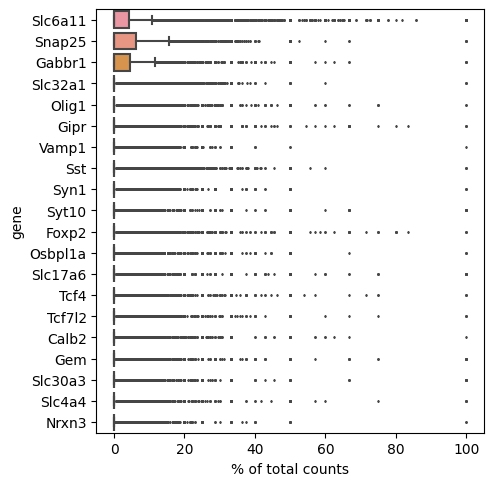

0.9446902063958529
4.471410195808567
1.5720164609053493
86.48000000000002


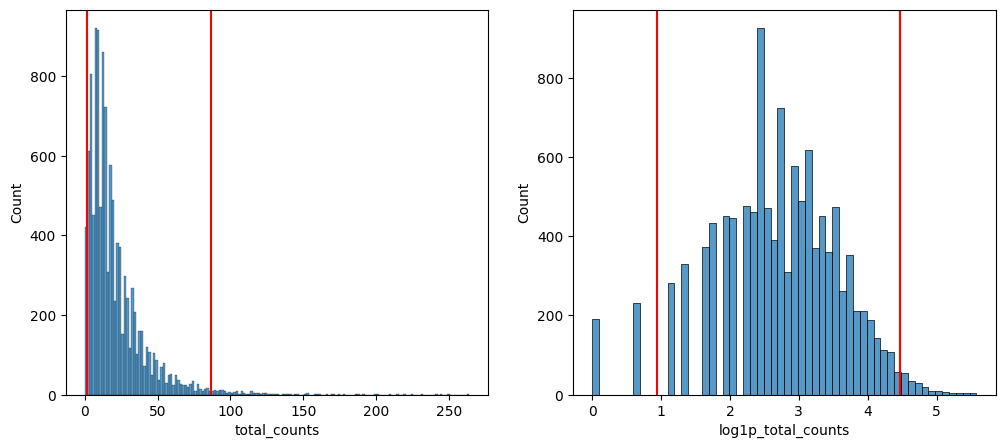

With current threshold, there are 11053 cells left and median counts per cell is 15.0


In [18]:
##Plot top 20 most expressed genes (before qc)
sc.pl.highest_expr_genes(rdata_sample5, n_top = 20)

# calculate pp metric
sc.pp.calculate_qc_metrics(rdata_sample5, percent_top = [5, 10, 50, 100], inplace=True)

# Calculate max count for each gene
rdata_sample5.var['max_counts_sample'] = rdata_sample5.X.max(axis=0)

# Total counts describe statistics
rdata_sample5.obs['total_counts'].describe()

# max counts describe statistics
rdata_sample5.var['max_counts_sample'].describe()

# mad threshold
from scipy import stats
n = 3
mad = stats.median_abs_deviation(rdata_sample5.obs['log1p_total_counts'], scale=1)
lower_bd = rdata_sample5.obs['log1p_total_counts'].median() - n*mad
upper_bd = rdata_sample5.obs['log1p_total_counts'].median() + n*mad

print(lower_bd)
print(upper_bd)
print(np.expm1(lower_bd))
print(np.expm1(upper_bd))

# mad threshold
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(rdata_sample5.obs['total_counts'], ax=axs[0])
axs[0].axvline(np.expm1(lower_bd), c='r')
axs[0].axvline(np.expm1(upper_bd), c='r')

sns.histplot(rdata_sample5.obs['log1p_total_counts'], ax=axs[1])
axs[1].axvline(lower_bd, c='r')
axs[1].axvline(upper_bd, c='r')

# plt.savefig(os.path.join(fig_path, 'reads_filtering_threshold.pdf'))
plt.show()

# Total counts describe statistics
ncell_left = rdata_sample5.obs.loc[(rdata_sample5.obs['total_counts'] >= np.expm1(lower_bd)) & (rdata_sample5.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].shape
median_counts = rdata_sample5.obs.loc[(rdata_sample5.obs['total_counts'] >= np.expm1(lower_bd)) & (rdata_sample5.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].median()

print(f'With current threshold, there are {ncell_left[0]} cells left and median counts per cell is {median_counts}')

# Filtration (cell)
# We changed min_genes for RIBOmap sample 5 to match cell numbers which pass QC to other samples
sc.pp.filter_cells(rdata_sample5, min_genes=5)
sc.pp.filter_cells(rdata_sample5, min_counts=np.expm1(lower_bd))
sc.pp.filter_cells(rdata_sample5, max_counts=np.expm1(upper_bd))

rdata_sample5.layers['raw'] = rdata_sample5.X.copy()
rdata_sample5.X.shape

# save combined h5ad
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
rdata_sample5.write_h5ad(f"{out_path}/{date}-rdata_sample5-3mad-filtered.h5ad")

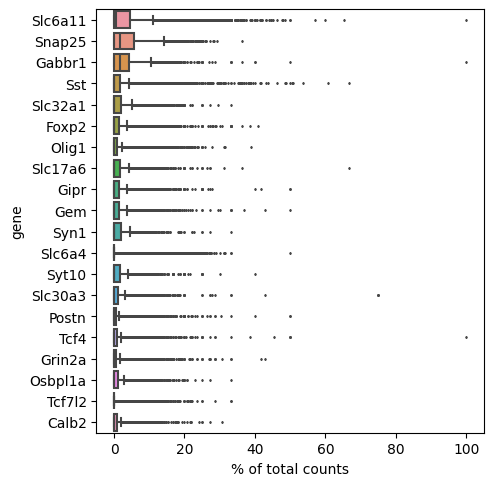

2.3795461341301745
5.444499876726118
9.800000000000004
230.48148148148144


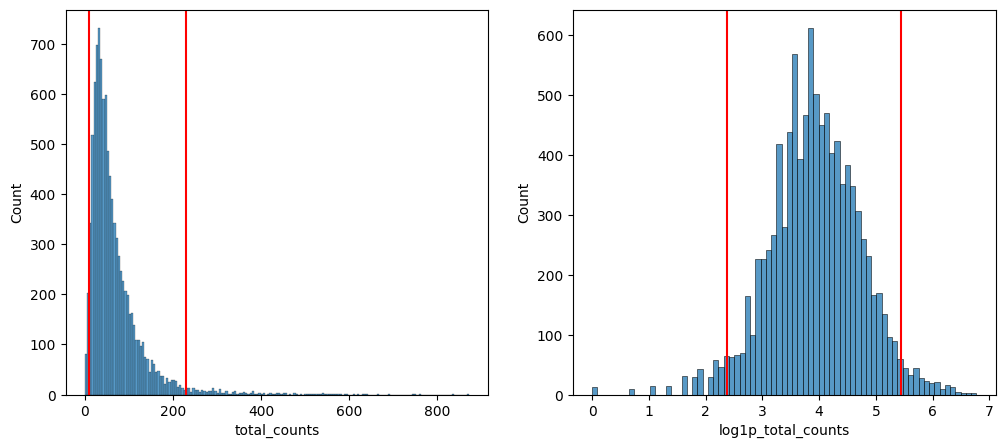

With current threshold, there are 9487 cells left and median counts per cell is 49.0


In [19]:
##RIBOmap sample 6

##Plot top 20 most expressed genes (before qc)
sc.pl.highest_expr_genes(rdata_sample6, n_top = 20)

# calculate pp metric
sc.pp.calculate_qc_metrics(rdata_sample6, percent_top = [5, 10, 50, 100], inplace=True)

# Calculate max count for each gene
rdata_sample6.var['max_counts_sample'] = rdata_sample6.X.max(axis=0)

# Total counts describe statistics
rdata_sample6.obs['total_counts'].describe()

# max counts describe statistics
rdata_sample6.var['max_counts_sample'].describe()

# mad threshold
from scipy import stats
n = 3
mad = stats.median_abs_deviation(rdata_sample6.obs['log1p_total_counts'], scale=1)
lower_bd = rdata_sample6.obs['log1p_total_counts'].median() - n*mad
upper_bd = rdata_sample6.obs['log1p_total_counts'].median() + n*mad

print(lower_bd)
print(upper_bd)
print(np.expm1(lower_bd))
print(np.expm1(upper_bd))

# mad threshold
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(rdata_sample6.obs['total_counts'], ax=axs[0])
axs[0].axvline(np.expm1(lower_bd), c='r')
axs[0].axvline(np.expm1(upper_bd), c='r')

sns.histplot(rdata_sample6.obs['log1p_total_counts'], ax=axs[1])
axs[1].axvline(lower_bd, c='r')
axs[1].axvline(upper_bd, c='r')

# plt.savefig(os.path.join(fig_path, 'reads_filtering_threshold.pdf'))
plt.show()

# Total counts describe statistics
ncell_left = rdata_sample6.obs.loc[(rdata_sample6.obs['total_counts'] >= np.expm1(lower_bd)) & (rdata_sample6.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].shape
median_counts = rdata_sample6.obs.loc[(rdata_sample6.obs['total_counts'] >= np.expm1(lower_bd)) & (rdata_sample6.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].median()

print(f'With current threshold, there are {ncell_left[0]} cells left and median counts per cell is {median_counts}')

# Filtration (cell)
sc.pp.filter_cells(rdata_sample6, min_genes=10)
sc.pp.filter_cells(rdata_sample6, min_counts=np.expm1(lower_bd))
sc.pp.filter_cells(rdata_sample6, max_counts=np.expm1(upper_bd))

rdata_sample6.layers['raw'] = rdata_sample6.X.copy()
rdata_sample6.X.shape

# save combined h5ad
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
rdata_sample6.write_h5ad(f"{out_path}/{date}-rdata_sample6-3mad-filtered.h5ad")

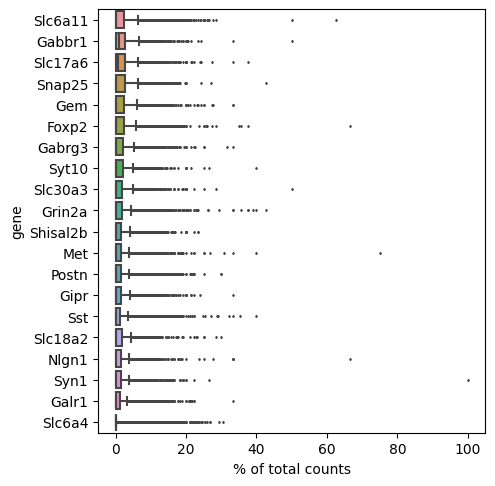

3.1337180165278937
5.152551436255171
21.959183673469383
171.87199999999999


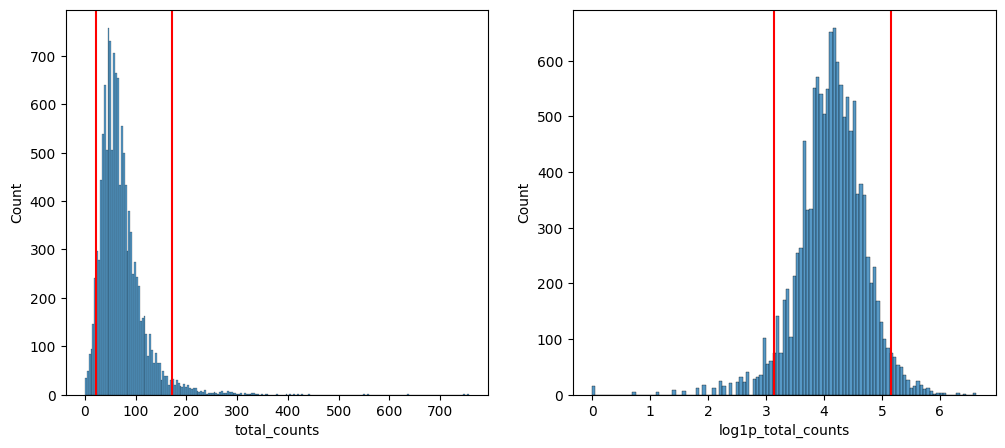

With current threshold, there are 12103 cells left and median counts per cell is 63.0


In [20]:
##Plot top 20 most expressed genes (before qc)
sc.pl.highest_expr_genes(rdata_sample7, n_top = 20)

# calculate pp metric
sc.pp.calculate_qc_metrics(rdata_sample7, percent_top = [5, 10, 50, 100], inplace=True)

# Calculate max count for each gene
rdata_sample7.var['max_counts_sample'] = rdata_sample7.X.max(axis=0)

# Total counts describe statistics
rdata_sample7.obs['total_counts'].describe()

# max counts describe statistics
rdata_sample7.var['max_counts_sample'].describe()

# mad threshold
from scipy import stats
n = 3
mad = stats.median_abs_deviation(rdata_sample7.obs['log1p_total_counts'], scale=1)
lower_bd = rdata_sample7.obs['log1p_total_counts'].median() - n*mad
upper_bd = rdata_sample7.obs['log1p_total_counts'].median() + n*mad

print(lower_bd)
print(upper_bd)
print(np.expm1(lower_bd))
print(np.expm1(upper_bd))

# mad threshold
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(rdata_sample7.obs['total_counts'], ax=axs[0])
axs[0].axvline(np.expm1(lower_bd), c='r')
axs[0].axvline(np.expm1(upper_bd), c='r')

sns.histplot(rdata_sample7.obs['log1p_total_counts'], ax=axs[1])
axs[1].axvline(lower_bd, c='r')
axs[1].axvline(upper_bd, c='r')

# plt.savefig(os.path.join(fig_path, 'reads_filtering_threshold.pdf'))
plt.show()

# Total counts describe statistics
ncell_left = rdata_sample7.obs.loc[(rdata_sample7.obs['total_counts'] >= np.expm1(lower_bd)) & (rdata_sample7.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].shape
median_counts = rdata_sample7.obs.loc[(rdata_sample7.obs['total_counts'] >= np.expm1(lower_bd)) & (rdata_sample7.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].median()

print(f'With current threshold, there are {ncell_left[0]} cells left and median counts per cell is {median_counts}')

# Filtration (cell)
sc.pp.filter_cells(rdata_sample7, min_genes=10)
sc.pp.filter_cells(rdata_sample7, min_counts=np.expm1(lower_bd))
sc.pp.filter_cells(rdata_sample7, max_counts=np.expm1(upper_bd))

rdata_sample7.layers['raw'] = rdata_sample7.X.copy()
rdata_sample7.X.shape

# save combined h5ad
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
rdata_sample7.write_h5ad(f"{out_path}/{date}-rdata_sample7-3mad-filtered.h5ad")

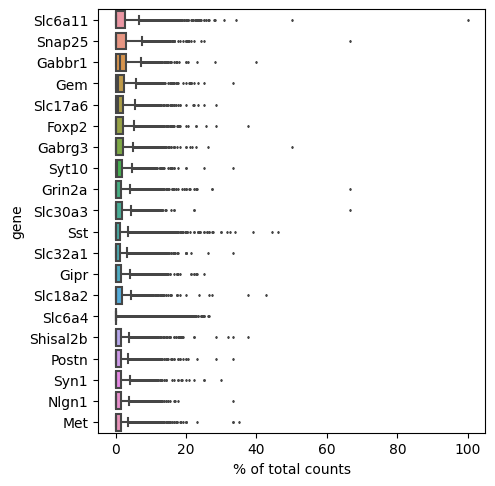

3.2286650671694463
5.352253815127336
24.245932841659076
210.0835053480953


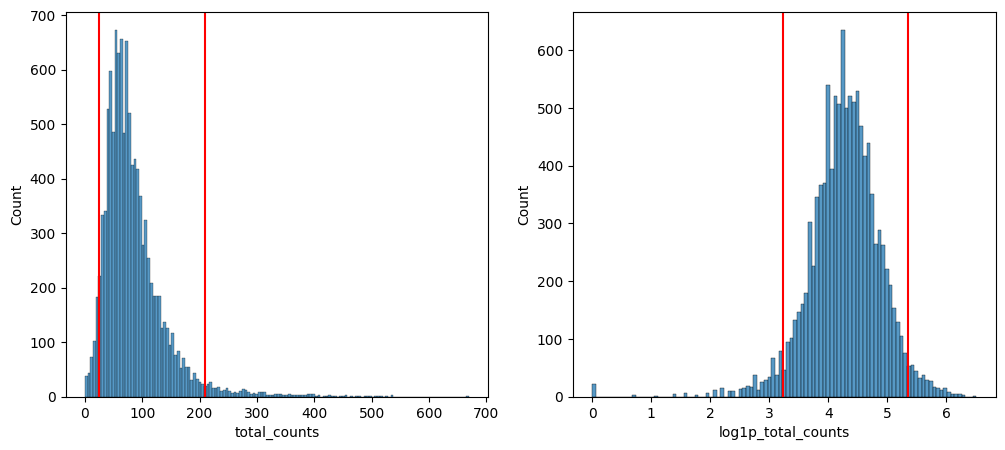

With current threshold, there are 10512 cells left and median counts per cell is 73.0


In [21]:
##RIBOmap sample 8

##Plot top 20 most expressed genes (before qc)
sc.pl.highest_expr_genes(rdata_sample8, n_top = 20)

# calculate pp metric
sc.pp.calculate_qc_metrics(rdata_sample8, percent_top = [5, 10, 50, 100], inplace=True)

# Calculate max count for each gene
rdata_sample8.var['max_counts_sample'] = rdata_sample8.X.max(axis=0)

# Total counts describe statistics
rdata_sample8.obs['total_counts'].describe()

# max counts describe statistics
rdata_sample8.var['max_counts_sample'].describe()

# mad threshold
from scipy import stats
n = 3
mad = stats.median_abs_deviation(rdata_sample8.obs['log1p_total_counts'], scale=1)
lower_bd = rdata_sample8.obs['log1p_total_counts'].median() - n*mad
upper_bd = rdata_sample8.obs['log1p_total_counts'].median() + n*mad

print(lower_bd)
print(upper_bd)
print(np.expm1(lower_bd))
print(np.expm1(upper_bd))

# mad threshold
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(rdata_sample8.obs['total_counts'], ax=axs[0])
axs[0].axvline(np.expm1(lower_bd), c='r')
axs[0].axvline(np.expm1(upper_bd), c='r')

sns.histplot(rdata_sample8.obs['log1p_total_counts'], ax=axs[1])
axs[1].axvline(lower_bd, c='r')
axs[1].axvline(upper_bd, c='r')

# plt.savefig(os.path.join(fig_path, 'reads_filtering_threshold.pdf'))
plt.show()

# Total counts describe statistics
ncell_left = rdata_sample8.obs.loc[(rdata_sample8.obs['total_counts'] >= np.expm1(lower_bd)) & (rdata_sample8.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].shape
median_counts = rdata_sample8.obs.loc[(rdata_sample8.obs['total_counts'] >= np.expm1(lower_bd)) & (rdata_sample8.obs['total_counts'] <= np.expm1(upper_bd)), 'total_counts'].median()

print(f'With current threshold, there are {ncell_left[0]} cells left and median counts per cell is {median_counts}')


# Filtration (cell)
sc.pp.filter_cells(rdata_sample8, min_genes=10)
sc.pp.filter_cells(rdata_sample8, min_counts=np.expm1(lower_bd))
sc.pp.filter_cells(rdata_sample8, max_counts=np.expm1(upper_bd))

rdata_sample8.layers['raw'] = rdata_sample8.X.copy()
rdata_sample8.X.shape

# save combined h5ad
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
rdata_sample8.write_h5ad(f"{out_path}/{date}-rdata_sample8-3mad-filtered.h5ad")

# Combine All Datasets

In [22]:
# combine eight datasets 
adata = ad.concat([sdata_sample1, sdata_sample2, sdata_sample3, sdata_sample4, rdata_sample5, rdata_sample6, rdata_sample7, rdata_sample8])
adata.obs.index = [str(s) for s in range(adata.obs.shape[0])]
adata

AnnData object with n_obs × n_vars = 85072 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_5_genes', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'n_genes', 'n_counts'
    layers: 'raw'

In [23]:
# add var
adata.var['max_counts_sample1_STARmap'] = sdata_sample1.var['max_counts_sample'].values
adata.var['max_counts_sample2_STARmap'] = sdata_sample2.var['max_counts_sample'].values
adata.var['max_counts_sample3_STARmap'] = sdata_sample3.var['max_counts_sample'].values
adata.var['max_counts_sample4_STARmap'] = sdata_sample4.var['max_counts_sample'].values
adata.var['max_counts_sample5_RIBOmap'] = rdata_sample5.var['max_counts_sample'].values
adata.var['max_counts_sample6_RIBOmap'] = rdata_sample6.var['max_counts_sample'].values
adata.var['max_counts_sample7_RIBOmap'] = rdata_sample7.var['max_counts_sample'].values
adata.var['max_counts_sample8_RIBOmap'] = rdata_sample8.var['max_counts_sample'].values


In [24]:
# add obs
adata.obs['protocol-sample'] = adata.obs['protocol'].astype(str) + '-' + adata.obs['sample'].astype(str) 
adata.obs['protocol-sample'] = adata.obs['protocol-sample'].astype('category')

In [25]:
# save a backup file 
adata.write_h5ad(os.path.join(out_path, f'{date}-Nectow-Lab-combined-3mad-filtered.h5ad'))

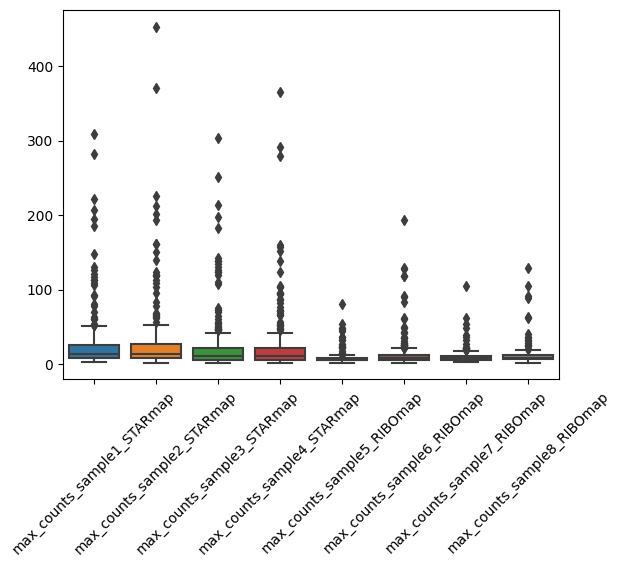

In [26]:
sns.boxplot(data=adata.var[["max_counts_sample1_STARmap", "max_counts_sample2_STARmap", "max_counts_sample3_STARmap", "max_counts_sample4_STARmap", "max_counts_sample5_RIBOmap", "max_counts_sample6_RIBOmap", "max_counts_sample7_RIBOmap", "max_counts_sample8_RIBOmap"]],)
# ax = plt.gca()
# ax.set_ylim([0, 10])
plt.xticks(rotation=45)
plt.show()

In [27]:
adata.obs['protocol-sample'].value_counts()

RIBOmap-Sample7    12103
STARmap-Sample4    11661
STARmap-Sample1    11608
RIBOmap-Sample8    10512
STARmap-Sample2    10494
STARmap-Sample3    10358
RIBOmap-Sample6     9187
RIBOmap-Sample5     9149
Name: protocol-sample, dtype: int64

# Combine STARmap Samples

In [28]:
# combine four datasets 
adata = ad.concat([sdata_sample1, sdata_sample2, sdata_sample3, sdata_sample4])
adata.obs.index = [str(s) for s in range(adata.obs.shape[0])]
adata

AnnData object with n_obs × n_vars = 44121 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_5_genes', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'n_genes', 'n_counts'
    layers: 'raw'

In [29]:
# add var
adata.var['max_counts_sample1_STARmap'] = sdata_sample1.var['max_counts_sample'].values
adata.var['max_counts_sample2_STARmap'] = sdata_sample2.var['max_counts_sample'].values
adata.var['max_counts_sample3_STARmap'] = sdata_sample3.var['max_counts_sample'].values
adata.var['max_counts_sample4_STARmap'] = sdata_sample4.var['max_counts_sample'].values

In [30]:
# add obs
adata.obs['protocol-sample'] = adata.obs['protocol'].astype(str) + '-' + adata.obs['sample'].astype(str) 
adata.obs['protocol-sample'] = adata.obs['protocol-sample'].astype('category')

In [31]:
# save a backup file 
adata.write_h5ad(os.path.join(out_path, f'{date}-Nectow-Lab-STARmap-combined-3mad-filtered.h5ad'))

# Combine RIBOmap Samples

In [32]:
# combine four datasets 
adata = ad.concat([rdata_sample5, rdata_sample6, rdata_sample7, rdata_sample8])
adata.obs.index = [str(s) for s in range(adata.obs.shape[0])]
adata

AnnData object with n_obs × n_vars = 40951 × 256
    obs: 'sample', 'area', 'protocol', 'x', 'y', 'seg_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_5_genes', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'n_genes', 'n_counts'
    layers: 'raw'

In [33]:
# add var
adata.var['max_counts_sample5_RIBOmap'] = rdata_sample5.var['max_counts_sample'].values
adata.var['max_counts_sample6_RIBOmap'] = rdata_sample6.var['max_counts_sample'].values
adata.var['max_counts_sample7_RIBOmap'] = rdata_sample7.var['max_counts_sample'].values
adata.var['max_counts_sample8_RIBOmap'] = rdata_sample8.var['max_counts_sample'].values


In [34]:
# add obs
adata.obs['protocol-sample'] = adata.obs['protocol'].astype(str) + '-' + adata.obs['sample'].astype(str) 
adata.obs['protocol-sample'] = adata.obs['protocol-sample'].astype('category')

In [35]:
# save a backup file 
adata.write_h5ad(os.path.join(out_path, f'{date}-Nectow-Lab-RIBOmap-combined-3mad-filtered.h5ad'))